## IMPORTS

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD DATA

In [170]:
df_test = pd.read_csv("../Ejecutable/test.csv")

In [171]:
len(df_test)

184

In [172]:
df_train = pd.read_csv('../Ejecutable/train.csv')

In [173]:
len(df_train)

732

In [174]:
df = pd.concat([df_train, df_test])

In [175]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2.0
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2.0
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
5,44.0,1.0,4.0,120.0,169.0,0.0,0.0,144.0,1.0,2.8,3.0,0.0,6.0,2.0
6,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0.0
7,62.0,1.0,4.0,135,297,0,0.0,130,1,1,2,?,?,2.0
8,68.0,1.0,4.0,135,0,0,1.0,120,1,0,1,?,7,3.0
9,50.0,1.0,4.0,140.0,231.0,0.0,1.0,140.0,1.0,5.0,2.0,-9.0,-9.0,4.0


# VARIABLES

- **AGE:** Cuantitativa Discreta 

- **SEX:** Categórica nominativa: (0, 1)

- **CP:** Tipo de dolor de pecho. (Categórica Ordinal: 1, 2, 3, 4)

- **TRESTBPS:** Presión arterial. (Cuantitativa Discreta)

- **CHOL:** Colesterol sérico. (Cuantitativa Discreta)

- **FBS:** Dolor por esfuerzo. (Categórica nominativa: 1 = sí, 0 = no)

- **RESTECG:** resultados electrocardiográficos. (Categórica Ordinal: 0, 1, 2)

- **THALACH:** Frecuencia cardíaca. (Cuantitativa Discreta)

- **EXANG:** Angina por ejercicio. (Categórica nominativa: 1 = sí, 0 = no)

- **OLDPEAK:** Depresión de ST. (Cuantitativa Continua)

- **SLOPE:**  La pendiente del segmento ST. (Categórica Ordinal: 1, 2, 3)

- **CA:** Número de vasos mayores. (Categórica Ordinal: 0, 1, 2, 3)

- **THAL:** Categórica Ordinal: 3, 6, 7

- **LABEL:** Categórica Ordinal: 0, 1, 2, 3, 4


## CLEANING DATA

In [176]:
df.reset_index(inplace=True)

In [177]:
df

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2.0
2,2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2.0
3,3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
4,4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0,NaN
912,180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?,NaN
913,181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [178]:
df.columns

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label'],
      dtype='object')

In [179]:
for i in df.columns:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0        0
1        1
2        2
3        3
4        4
      ... 
911    179
912    180
913    181
914    182
915    183
Name: index, Length: 916, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      51.0
1      54.0
2      63.0
3      52.0
4      55.0
       ... 
911    54.0
912    55.0
913    67.0
914    59.0
915    58.0
Name: age, Length: 916, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
911    1.0
912    1.0
913    1.0
914    1.0
915    1.0
Name: sex, Length: 916, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      1.0
1      3.0
2      4.0
3      2.0
4      4.0
      ... 
911    4.0
912    2.0
913    3.0
914    1.0
915    4.0
Name: cp, Length: 916, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      125.0
1      120.0
2        140
3      140.0
4      140.0
       ...  
911    200.0
912      110
913    152.0
914    17

In [180]:
df.isna().sum()

index         0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
label       184
dtype: int64

In [181]:
df = df.replace({"?":np.nan, "-9.0": np.nan, -9.0:np.nan, "nan":np.nan})

In [182]:
df.isna().sum()

index         0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          89
restecg       2
thalach      55
exang        55
oldpeak      62
slope       308
ca          607
thal        483
label       184
dtype: int64

# OVERVIEW

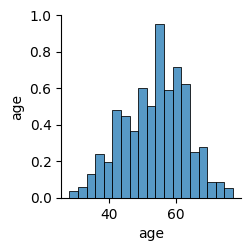

In [183]:
df_graf = df[['age', 'trestbps', 'chol', 'oldpeak', ]]
sns.pairplot(df_graf, kind='scatter')



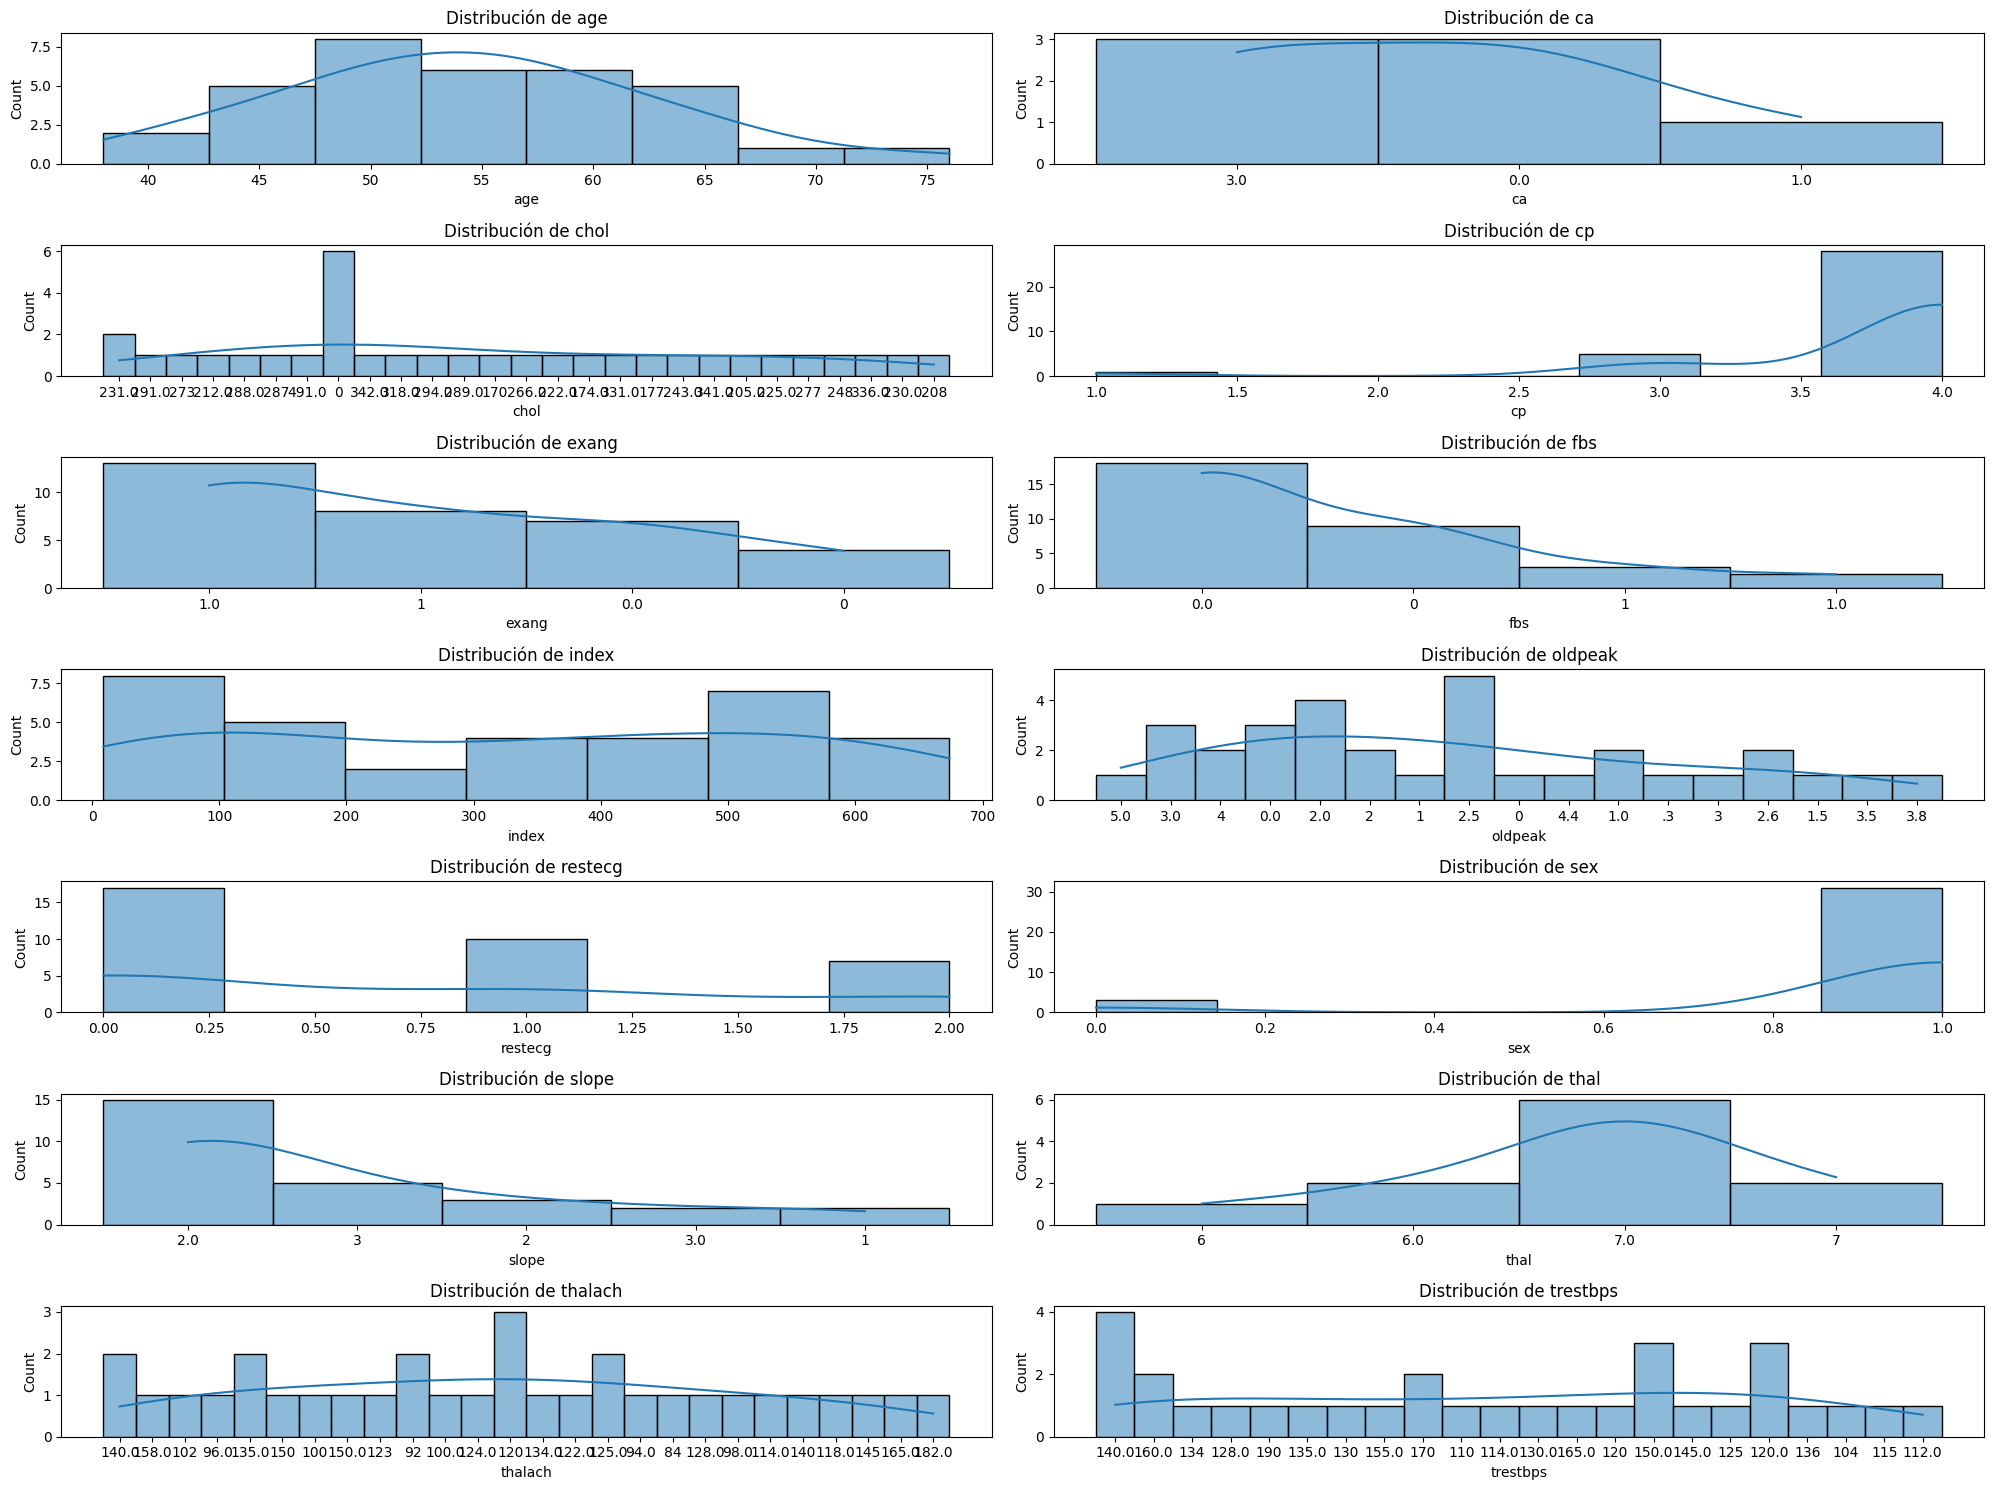

In [184]:
# Filtrar los datos donde label es igual a 4
df_label_4 = df[df['label'] == 4]

# Lista de columnas para graficar, excluyendo la columna 'label'
columns_to_plot = df_label_4.columns.difference(['label'])

# Configurar el tamaño de la figura para que las gráficas sean legibles
plt.figure(figsize=(20, 15))

# Crear un gráfico para cada variable
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot)//2 + len(columns_to_plot)%2, 2, i)
    sns.histplot(df_label_4[column], kde=True)
    plt.title(f'Distribución de {column}')

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

# LIMPIEZA POR VARIABLE Y ANÁLISIS UNIVARIADO

## AGE

In [185]:
df['age'] = df['age'].astype(int)

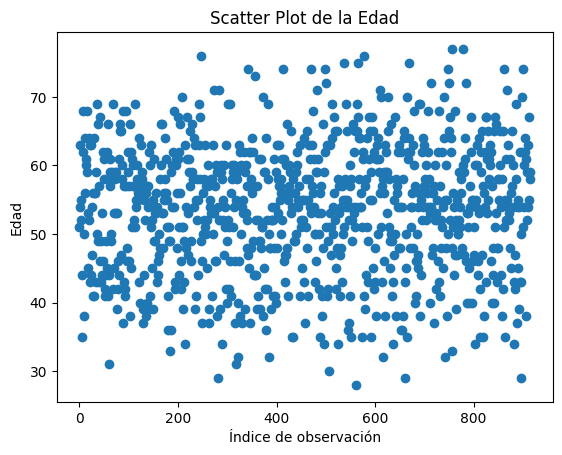

In [186]:
indices = range(len(df['age']))

# Graficar scatter plot
plt.scatter(indices, df['age'])
plt.title('Scatter Plot de la Edad')
plt.xlabel('Índice de observación')
plt.ylabel('Edad')
plt.show()

## SEX

In [187]:
df['sex'] = df['sex'].astype(int)

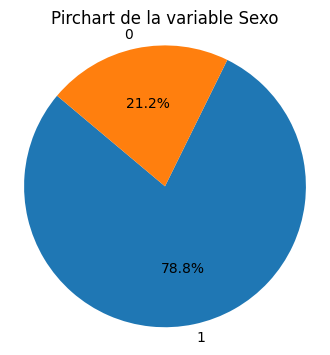

In [188]:
counts = df['sex'].value_counts()

labels = counts.index.tolist()
sizes = counts.values.tolist()

plt.figure(figsize=(4, 4)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Pirchart de la variable Sexo')
plt.axis('equal') 
plt.show()

## CP

In [189]:
df['cp'] = df['cp'].astype(int)
df['cp'] = df['cp'].astype(str)

In [190]:
df['cp'].value_counts()

4    495
3    204
2    173
1     44
Name: cp, dtype: int64

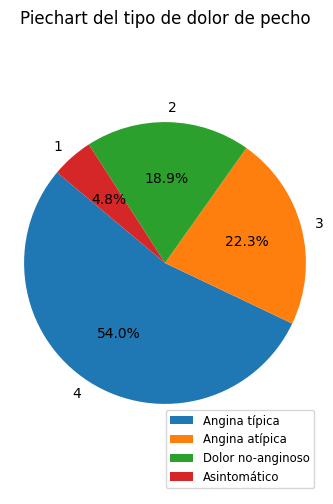

In [191]:
counts = df['cp'].value_counts()

labels = counts.index.tolist()
sizes = counts.values.tolist()

plt.figure(figsize=(4, 6)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Piechart del tipo de dolor de pecho')
plt.axis('equal')
plt.legend(loc='lower right', labels=['Angina típica', 'Angina atípica', 'Dolor no-anginoso', 'Asintomático'], fontsize = 'small') 
plt.show()

## TRESTBPS

In [192]:
df['trestbps'] = df['trestbps'].astype(float)

In [193]:
df['trestbps'] = df['trestbps'].astype(str)

In [194]:
len(df['trestbps'].unique())

62

In [195]:
df['trestbps'].unique()

array(['125.0', '120.0', '140.0', '122.0', '135.0', '100.0', '130.0',
       '104.0', '124.0', '96.0', 'nan', '160.0', '110.0', '134.0',
       '146.0', '128.0', '105.0', '190.0', '108.0', '115.0', '150.0',
       '112.0', '178.0', '132.0', '145.0', '170.0', '155.0', '138.0',
       '144.0', '180.0', '95.0', '117.0', '142.0', '192.0', '114.0',
       '158.0', '148.0', '172.0', '154.0', '152.0', '118.0', '106.0',
       '165.0', '102.0', '113.0', '174.0', '126.0', '116.0', '127.0',
       '185.0', '200.0', '136.0', '94.0', '0.0', '92.0', '164.0', '123.0',
       '98.0', '156.0', '129.0', '80.0', '101.0'], dtype=object)

In [196]:
for i in df.index:
    if df['trestbps'][i] == 'nan':
        df['trestbps'][i] = np.nan

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_2404\2213765485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'][i] = np.nan


In [197]:
for i in df.index:
    if df['trestbps'][i] == '0.0':
        df['trestbps'][i] = np.nan

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_2404\2452344470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps'][i] = np.nan


In [198]:
df['trestbps'] = df['trestbps'].astype(float)
df.nsmallest(5, 'trestbps')

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
789,57,53,1,4,80.0,0,NaN,0,141,1,2,3,NaN,NaN,NaN
602,602,38,1,4,92.0,117.0,0.0,0.0,134.0,1.0,2.5,2.0,NaN,NaN,1.0
560,560,51,1,3,94.0,227.0,0.0,0.0,154.0,1.0,0.0,1.0,1.0,7.0,0.0
579,579,39,0,3,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0.0
95,95,57,1,4,95.0,0,NaN,0.0,182,0,.7,3,NaN,NaN,1.0


In [199]:
df['trestbps'].unique()

array([125., 120., 140., 122., 135., 100., 130., 104., 124.,  96.,  nan,
       160., 110., 134., 146., 128., 105., 190., 108., 115., 150., 112.,
       178., 132., 145., 170., 155., 138., 144., 180.,  95., 117., 142.,
       192., 114., 158., 148., 172., 154., 152., 118., 106., 165., 102.,
       113., 174., 126., 116., 127., 185., 200., 136.,  94.,  92., 164.,
       123.,  98., 156., 129.,  80., 101.])

Text(0, 0.5, 'Número de observaciones')

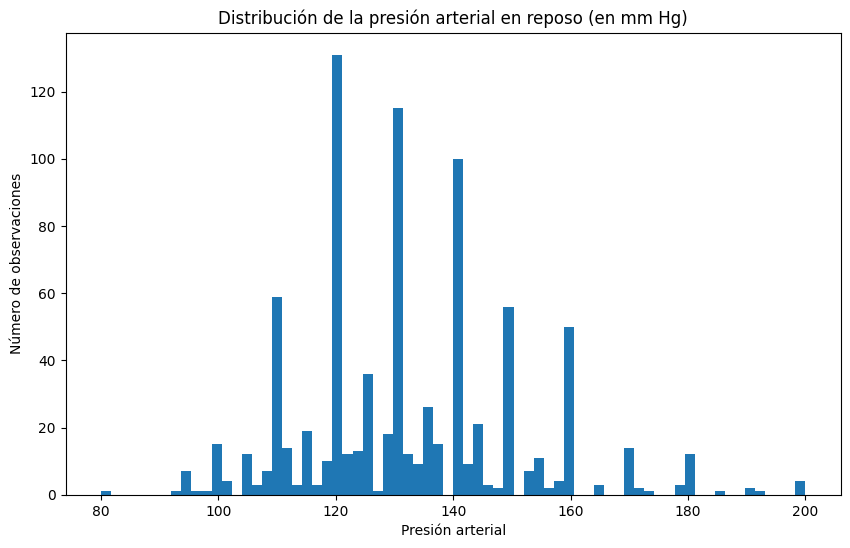

In [200]:
plt.figure(figsize = (10,6))
plt.hist(df['trestbps'], bins = 70)
plt.title('Distribución de la presión arterial en reposo (en mm Hg)')
plt.xlabel('Presión arterial')
plt.ylabel('Número de observaciones')

In [201]:
df['trestbps'].describe()

count    856.000000
mean     132.296729
std       18.526814
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

## CHOL

In [202]:
df['chol'] = df['chol'].astype(float)

In [203]:
df['chol'].value_counts()

0.0      171
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
347.0      1
262.0      1
185.0      1
178.0      1
337.0      1
Name: chol, Length: 217, dtype: int64

In [204]:
df['chol'].unique()

array([213., 237.,   0.,  nan, 217., 169., 192., 297., 231., 246., 256.,
       282., 338., 211., 208., 243., 259., 303., 177., 305., 233., 165.,
       291., 172., 235., 273., 409., 234., 142., 278., 175., 229., 249.,
       254., 212., 288., 215., 222., 287., 180., 204., 141., 269., 260.,
       171., 261., 219., 491., 207., 295., 239., 518., 326., 264., 307.,
       238., 226., 252., 228., 257., 263., 316., 340., 193., 173., 201.,
       274., 275., 272., 311., 255., 224., 339., 126., 342., 236., 232.,
       283., 258., 223., 266., 466., 265., 240., 241., 290., 214., 164.,
       198., 230., 267., 404., 344., 200., 253., 195., 188., 197., 186.,
       184., 318., 268., 216., 245., 313., 179., 203., 166., 157., 160.,
       294., 341., 298., 277., 209., 302., 194., 322., 182., 149., 247.,
       276., 289., 271., 308., 250., 458., 242., 315., 310., 199., 330.,
       270., 147., 603., 220., 468., 285., 131., 178., 210., 248., 205.,
       206., 244., 100., 280., 218., 202., 225., 16

Text(0, 0.5, 'Número de observaciones')

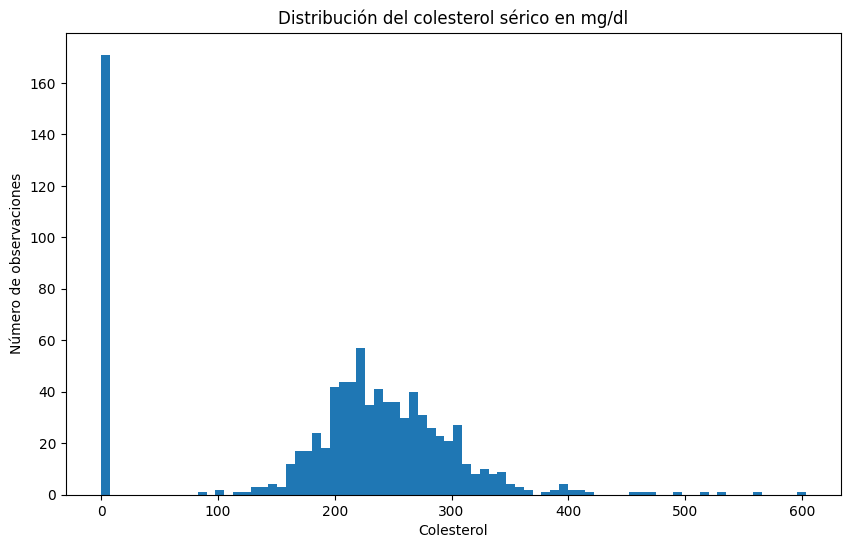

In [205]:
plt.figure(figsize = (10,6))
plt.hist(df['chol'], bins=80)
plt.title('Distribución del colesterol sérico en mg/dl')
plt.xlabel('Colesterol')
plt.ylabel('Número de observaciones')

## FBS

In [206]:
df['fbs'] = df['fbs'].astype(str)

In [207]:
df['fbs'] = df['fbs'].astype(float)
df['fbs'] = df['fbs'].astype('Int64')
df['fbs'] = df['fbs'].astype(str)

In [208]:
df['fbs'].unique()

array(['0', '<NA>', '1'], dtype=object)

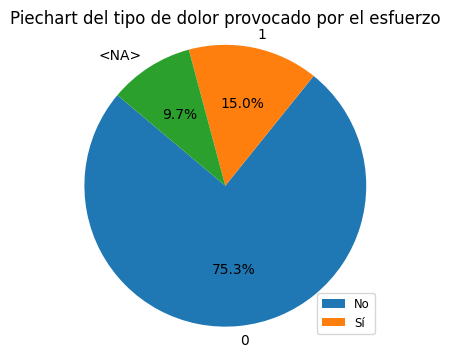

In [209]:
counts = df['fbs'].value_counts()

labels = counts.index.tolist()
sizes = counts.values.tolist()

plt.figure(figsize=(4, 4)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Piechart del tipo de dolor provocado por el esfuerzo')
plt.axis('equal') 
plt.legend(loc='lower right', labels=['No', 'Sí'], fontsize = 'small') 
plt.show()

## RESTECG

In [210]:
df['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [211]:
df['restecg'].value_counts()

0.0    439
2.0    148
1.0    145
0.0     77
0       33
2.0     29
1       25
2       10
1.0      8
Name: restecg, dtype: int64

In [212]:
df['restecg'] = df['restecg'].astype(float)

In [213]:
df['restecg'].value_counts()

0.0    549
2.0    187
1.0    178
Name: restecg, dtype: int64

In [214]:
df['restecg'] = df['restecg'].astype('Int64')
df['restecg'] = df['restecg'].astype('str')

In [215]:
df['restecg'].value_counts()

0       549
2       187
1       178
<NA>      2
Name: restecg, dtype: int64

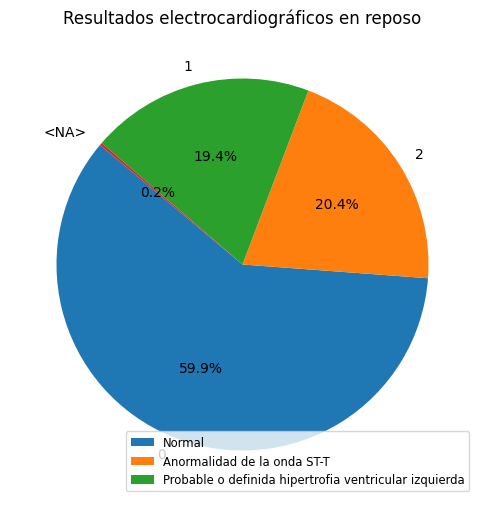

In [216]:
counts = df['restecg'].value_counts()

labels = counts.index.tolist()
sizes = counts.values.tolist()

plt.figure(figsize=(6, 10)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Resultados electrocardiográficos en reposo')
plt.legend(loc='lower right', labels=['Normal', 'Anormalidad de la onda ST-T', 'Probable o definida hipertrofia ventricular izquierda'], fontsize = 'small') 

## THALACH

In [217]:
df['thalach'] = df['thalach'].astype(float)
df['thalach'] = df['thalach'].astype('Int64')

In [218]:
df['thalach']

0       125
1       150
2       149
3       140
4       111
       ... 
911     142
912     180
913     150
914     159
915    <NA>
Name: thalach, Length: 916, dtype: Int64

In [219]:
df['thalach'].unique()

<IntegerArray>
[125, 150, 149, 140, 111, 144, 174, 130, 120, 179,
 ...
 202, 167, 188,  78, 181, 177,  67,  71,  87,  91]
Length: 120, dtype: Int64

In [220]:
df['thalach'].value_counts()

150    42
140    41
120    35
130    30
160    26
       ..
107     1
69      1
83      1
195     1
91      1
Name: thalach, Length: 119, dtype: Int64

In [221]:
print(df['thalach'].isna().sum())



55


(array([ 1.,  0.,  3.,  1.,  1.,  2.,  3.,  1.,  4.,  4.,  4.,  4.,  1.,
         4.,  5.,  5.,  6.,  5.,  8.,  3.,  3.,  4.,  7., 11.,  7.,  9.,
         6., 11.,  5., 12.,  7., 11., 16.,  9.,  5.,  9.,  9., 12.,  0.,
        10.,  3.,  5.,  3.,  2.,  1.,  1.,  2.,  0.,  0.,  1.]),
 array([ 90.  ,  92.24,  94.48,  96.72,  98.96, 101.2 , 103.44, 105.68,
        107.92, 110.16, 112.4 , 114.64, 116.88, 119.12, 121.36, 123.6 ,
        125.84, 128.08, 130.32, 132.56, 134.8 , 137.04, 139.28, 141.52,
        143.76, 146.  , 148.24, 150.48, 152.72, 154.96, 157.2 , 159.44,
        161.68, 163.92, 166.16, 168.4 , 170.64, 172.88, 175.12, 177.36,
        179.6 , 181.84, 184.08, 186.32, 188.56, 190.8 , 193.04, 195.28,
        197.52, 199.76, 202.  ]),
 <BarContainer object of 50 artists>)

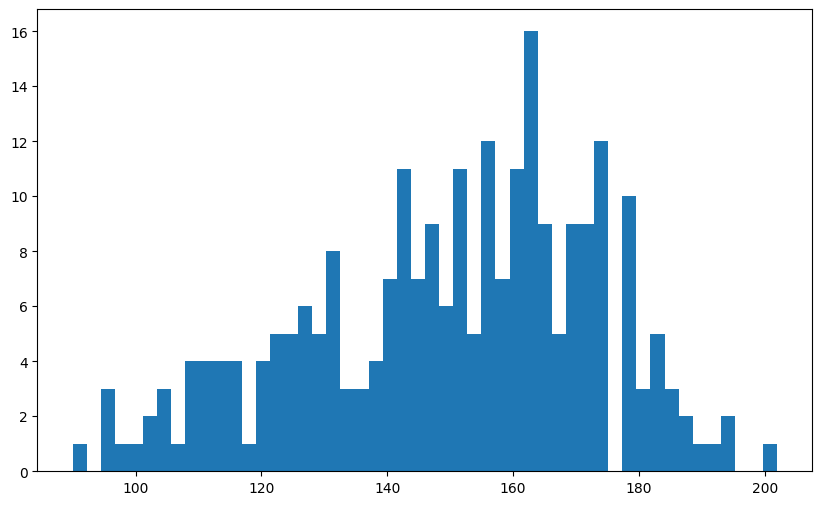

In [222]:
hist1 = df.dropna()
plt.figure(figsize=(10,6))
plt.hist(hist1['thalach'], bins = 50)

## EXANG

In [223]:
df['exang'] = df['exang'].astype(float)
df['exang'] = df['exang'].astype('Int64')
df['exang'] = df['exang'].astype(str)

In [224]:
df['exang'].unique()

array(['1', '0', '<NA>'], dtype=object)

In [225]:
df['exang'].value_counts()

0       525
1       336
<NA>     55
Name: exang, dtype: int64

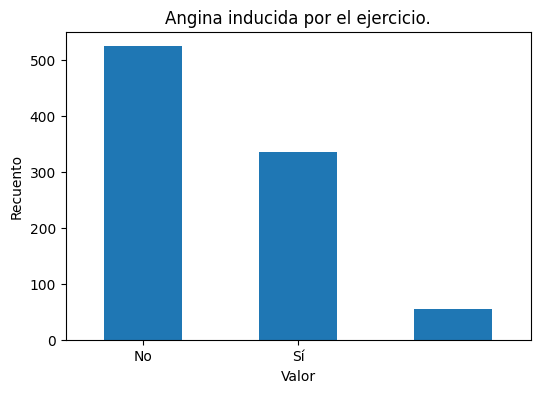

In [226]:
counts = df['exang'].value_counts()

plt.figure(figsize=(6, 4))
counts.plot(kind='bar')

plt.title('Angina inducida por el ejercicio.')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.show()

## OLDPEAK

In [227]:
df['oldpeak'] = df['oldpeak'].astype(float)
df['oldpeak'].unique()

array([ 1.4,  1.5,  2. ,  0. ,  5.6,  2.8,  1. ,  5. , -1.1,  2.2,  0.6,
        4. ,  0.5,  3. ,  2.5,  0.4,  nan,  1.9,  0.9,  0.1,  0.8,  0.2,
       -0.5,  1.8,  3.4,  2.3,  1.6,  0.7,  1.2,  2.6,  6.2, -2.6,  4.4,
        2.4,  4.2, -0.9,  0.3,  1.1,  2.1,  3.5,  3.1, -1. ,  1.3,  3.2,
       -2. ,  1.7,  3.6, -1.5,  2.9,  3.8, -0.8,  3.7, -0.1, -0.7])

In [228]:
df['oldpeak'].unique()

array([ 1.4,  1.5,  2. ,  0. ,  5.6,  2.8,  1. ,  5. , -1.1,  2.2,  0.6,
        4. ,  0.5,  3. ,  2.5,  0.4,  nan,  1.9,  0.9,  0.1,  0.8,  0.2,
       -0.5,  1.8,  3.4,  2.3,  1.6,  0.7,  1.2,  2.6,  6.2, -2.6,  4.4,
        2.4,  4.2, -0.9,  0.3,  1.1,  2.1,  3.5,  3.1, -1. ,  1.3,  3.2,
       -2. ,  1.7,  3.6, -1.5,  2.9,  3.8, -0.8,  3.7, -0.1, -0.7])

Text(0, 0.5, 'Frecuencia')

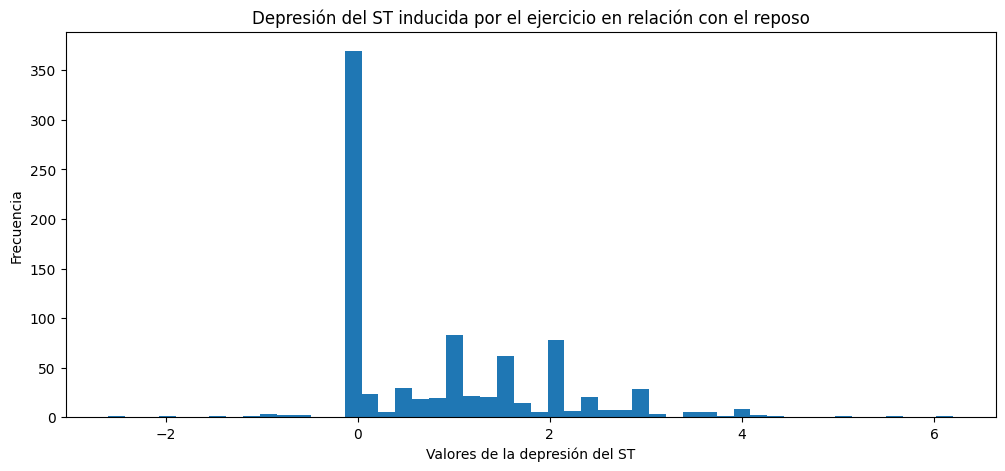

In [229]:
plt.figure(figsize=(12, 5))
plt.hist(df['oldpeak'], bins=50)
plt.title('Depresión del ST inducida por el ejercicio en relación con el reposo')
plt.xlabel('Valores de la depresión del ST')
plt.ylabel('Frecuencia')

## SLOPE

In [230]:
df['slope'] = df['slope'].astype(float)
df['slope'] = df['slope'].replace('.0', np.nan)
df['slope'] = df['slope'].astype('Int64')

In [231]:
df['slope'].value_counts()

2    344
1    202
3     62
Name: slope, dtype: Int64

In [232]:
df['slope'].unique()

<IntegerArray>
[1, <NA>, 3, 2]
Length: 4, dtype: Int64

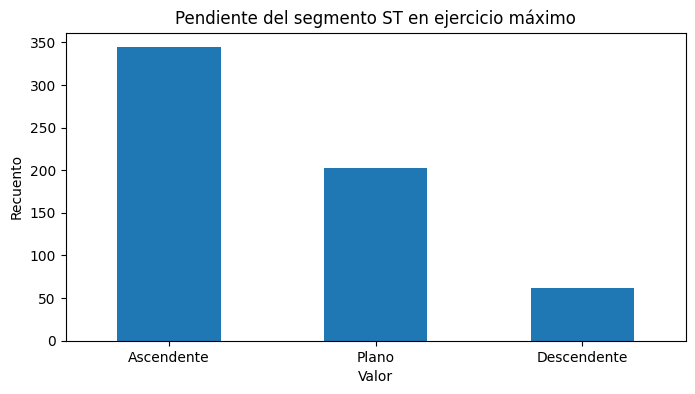

In [233]:
counts = df['slope'].value_counts()

plt.figure(figsize=(8, 4))
counts.plot(kind='bar')

plt.title('Pendiente del segmento ST en ejercicio máximo')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks([0, 1, 2], ['Ascendente', 'Plano', 'Descendente'], rotation=0)
plt.show()

## CA

In [234]:
df['ca'] = df['ca'].astype(float)
df['ca'] = df['ca'].astype('Int64')
df['ca'].value_counts()

0    180
1     67
2     41
3     20
9      1
Name: ca, dtype: Int64

In [235]:
df['ca'] = df['ca'].replace(9, np.nan)
df['ca'].value_counts()

0    180
1     67
2     41
3     20
Name: ca, dtype: Int64

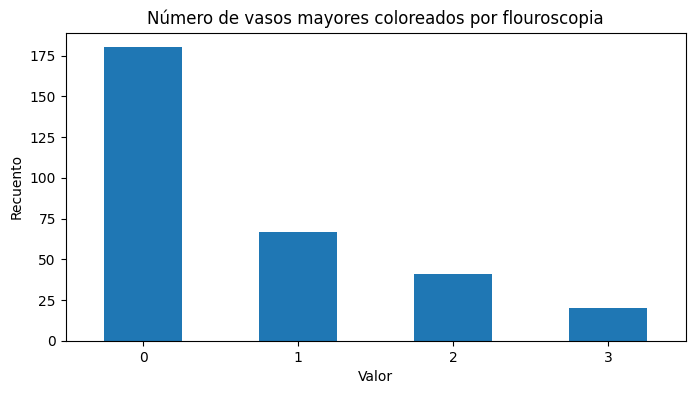

In [236]:
counts = df['ca'].value_counts()

plt.figure(figsize=(8, 4))
counts.plot(kind='bar')

plt.title('Número de vasos mayores coloreados por flouroscopia')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks([0, 1, 2, 3], rotation=0)
plt.show()

# THAL

In [237]:
df['thal'].value_counts()

3.0    173
7.0    128
7       64
6.0     27
3       23
6       18
Name: thal, dtype: int64

In [238]:
df['thal'] = df['thal'].astype(float)
df['thal'] = df['thal'].astype('Int64')
df['thal'].value_counts()

3    196
7    192
6     45
Name: thal, dtype: Int64

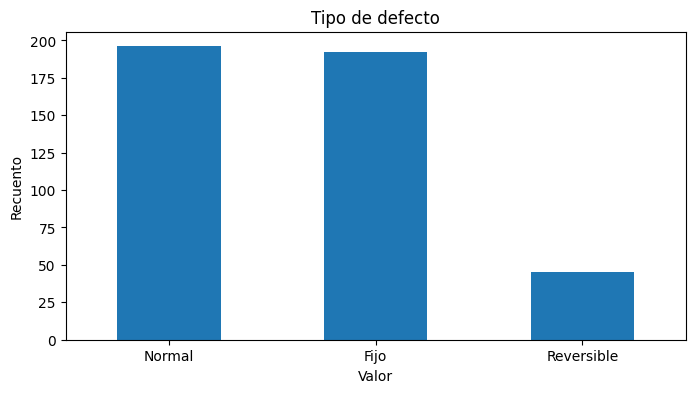

In [239]:
counts = df['thal'].value_counts()

plt.figure(figsize=(8, 4))
counts.plot(kind='bar')

plt.title('Tipo de defecto')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks([0, 1, 2], ['Normal', 'Fijo', 'Reversible'], rotation=0 )
plt.show()

# LABEL

In [240]:
df['label'] = df['label'].astype('Int64')
df['label'] = df['label'].astype(str)

In [241]:
df['label'].unique()

array(['0', '2', '3', '4', '1', '<NA>'], dtype=object)

In [242]:
df[df['label'].isna() == False]

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0,2,125,1,1.4,1,1,3,0
1,1,54,1,3,120.0,237.0,0,0,150,1,1.5,<NA>,<NA>,7,2
2,2,63,1,4,140.0,0.0,<NA>,2,149,0,2.0,1,<NA>,<NA>,2
3,3,52,0,2,140.0,NaN,0,0,140,0,0.0,<NA>,<NA>,<NA>,0
4,4,55,1,4,140.0,217.0,0,0,111,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0,0,142,1,2.0,2,<NA>,<NA>,<NA>
912,180,55,1,2,110.0,214.0,1,1,180,0,NaN,<NA>,<NA>,<NA>,<NA>
913,181,67,1,3,152.0,212.0,0,2,150,0,0.8,2,0,7,<NA>
914,182,59,1,1,170.0,288.0,0,2,159,0,0.2,2,0,7,<NA>


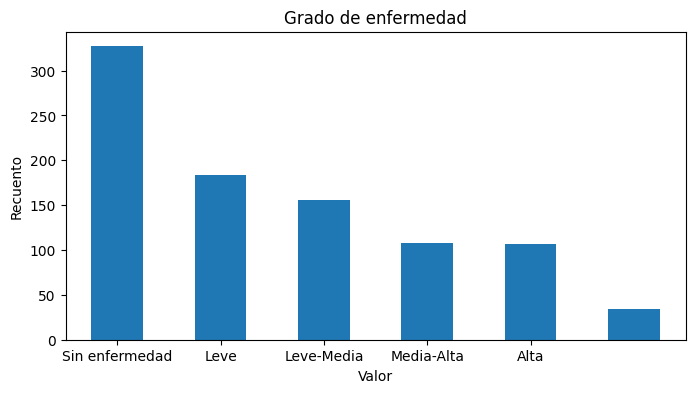

In [243]:
counts = df['label'].value_counts()

plt.figure(figsize=(8, 4))
counts.plot(kind='bar')

plt.title('Grado de enfermedad')
plt.xlabel('Valor')
plt.ylabel('Recuento')
plt.xticks([0, 1, 2, 3, 4], ['Sin enfermedad', 'Leve', 'Leve-Media', 'Media-Alta', 'Alta'], rotation=0 )
plt.show()

In [244]:
df.describe()

,index,age,sex,trestbps,chol,thalach,oldpeak,slope,ca,thal
count,916.000000,916.000000,916.00000,856.000000,886.000000,861.0,854.000000,608.0,308.0,433.0
mean,310.460699,53.528384,0.78821,132.296729,199.146727,137.533101,0.875878,1.769737,0.678571,5.08545
std,219.894251,9.397376,0.40880,18.526814,110.762998,25.939337,1.089846,0.617914,0.936378,1.920792
min,0.000000,28.000000,0.00000,80.000000,0.000000,60.0,-2.600000,1.0,0.0,3.0
25%,114.000000,47.000000,1.00000,120.000000,175.000000,120.0,0.000000,1.0,0.0,3.0
50%,273.500000,54.000000,1.00000,130.000000,223.000000,140.0,0.500000,2.0,0.0,6.0
75%,502.250000,60.000000,1.00000,140.000000,268.000000,157.0,1.500000,2.0,1.0,7.0
max,731.000000,77.000000,1.00000,200.000000,603.000000,202.0,6.200000,3.0,3.0,7.0


In [245]:
df.head(20)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0,2,125,1,1.4,1,1,3,0
1,1,54,1,3,120.0,237.0,0,0,150,1,1.5,<NA>,<NA>,7,2
2,2,63,1,4,140.0,0.0,<NA>,2,149,0,2.0,1,<NA>,<NA>,2
3,3,52,0,2,140.0,NaN,0,0,140,0,0.0,<NA>,<NA>,<NA>,0
4,4,55,1,4,140.0,217.0,0,0,111,1,5.6,3,0,7,3
5,5,44,1,4,120.0,169.0,0,0,144,1,2.8,3,0,6,2
6,6,35,1,2,122.0,192.0,0,0,174,0,0.0,1,0,3,0
7,7,62,1,4,135.0,297.0,0,0,130,1,1.0,2,<NA>,<NA>,2
8,8,68,1,4,135.0,0.0,0,1,120,1,0.0,1,<NA>,7,3
9,9,50,1,4,140.0,231.0,0,1,140,1,5.0,2,<NA>,<NA>,4


# CAMBIAR NA(str) A NaN(numpy)

In [246]:
df.replace({'<NA>':np.nan}, inplace=True)

# ANÁLISIS BIVARIADO

In [247]:
correlacion = df.corr()

# Mostramos la matriz de correlación
print(correlacion)

             index       age       sex  trestbps      chol   thalach  \
index     1.000000  0.009376  0.004333  0.013679 -0.005266  0.052426   
age       0.009376  1.000000  0.058179  0.249144 -0.091229 -0.366697   
sex       0.004333  0.058179  1.000000  0.005895 -0.197801 -0.180025   
trestbps  0.013679  0.249144  0.005895  1.000000  0.075404 -0.104417   
chol     -0.005266 -0.091229 -0.197801  0.075404  1.000000  0.235477   
thalach   0.052426 -0.366697 -0.180025 -0.104417  0.235477  1.000000   
oldpeak  -0.022046  0.254805  0.102933  0.170679  0.046726 -0.149286   
slope     0.001320  0.147920  0.124853  0.064291 -0.064665 -0.364551   
ca        0.052474  0.373453  0.095866  0.095646  0.051329 -0.264195   
thal      0.099973  0.136450  0.373528  0.106890 -0.180299 -0.327854   

           oldpeak     slope        ca      thal  
index    -0.022046  0.001320  0.052474  0.099973  
age       0.254805  0.147920  0.373453  0.136450  
sex       0.102933  0.124853  0.095866  0.373528  
tre

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_2404\868053280.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


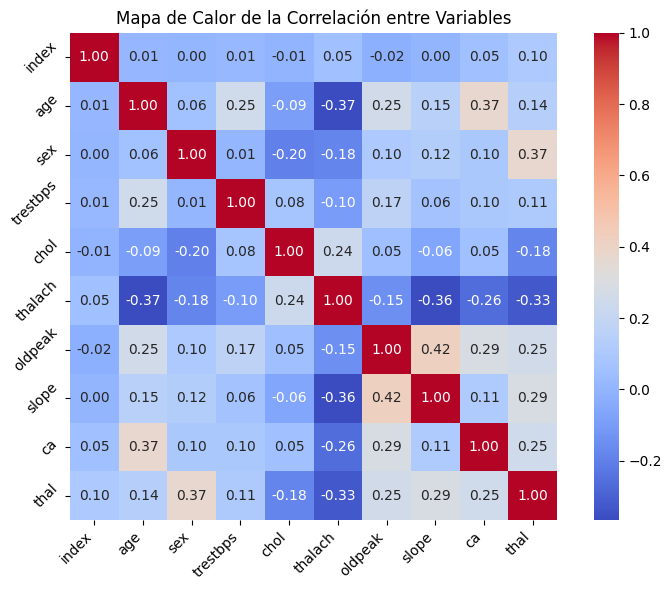

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya calculaste la matriz de correlación 'correlacion'
# Generar el mapa de calor
plt.figure(figsize=(8, 6)) # Ajusta el tamaño del gráfico según necesites
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Añadir título y ajustes finales
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mejor lectura
plt.yticks(rotation=45) # Rotar las etiquetas del eje y si es necesario
plt.tight_layout() # Ajusta automáticamente los parámetros del subplot para que el gráfico encaje en el área

# Mostrar el gráfico
plt.show()


Text(0, 0.5, 'Edad')

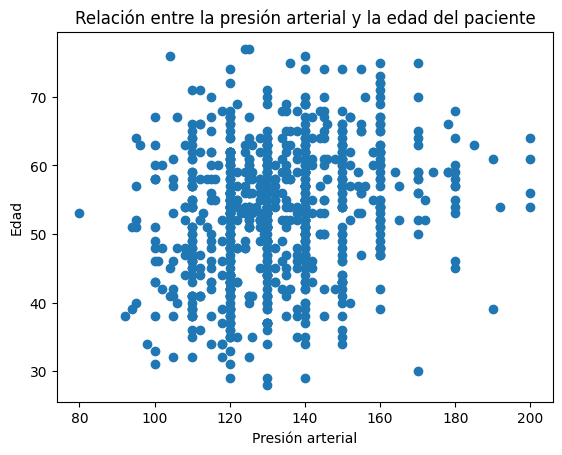

In [249]:
plt.scatter(df['trestbps'], df['age'])
plt.title('Relación entre la presión arterial y la edad del paciente')
plt.xlabel('Presión arterial')
plt.ylabel('Edad')

Text(0, 0.5, 'Edad')

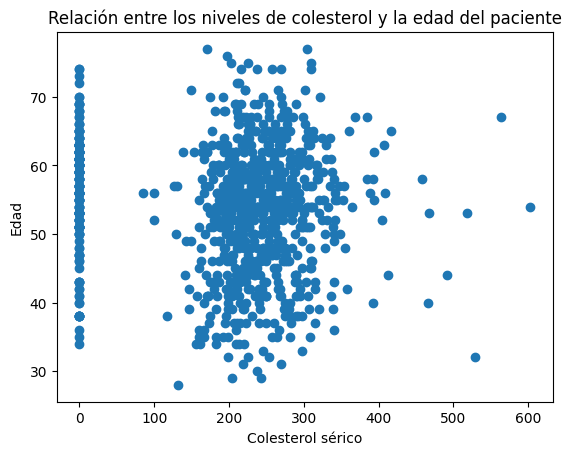

In [250]:
plt.scatter(df['chol'], df['age'])
plt.title('Relación entre los niveles de colesterol y la edad del paciente')
plt.xlabel('Colesterol sérico')
plt.ylabel('Edad')


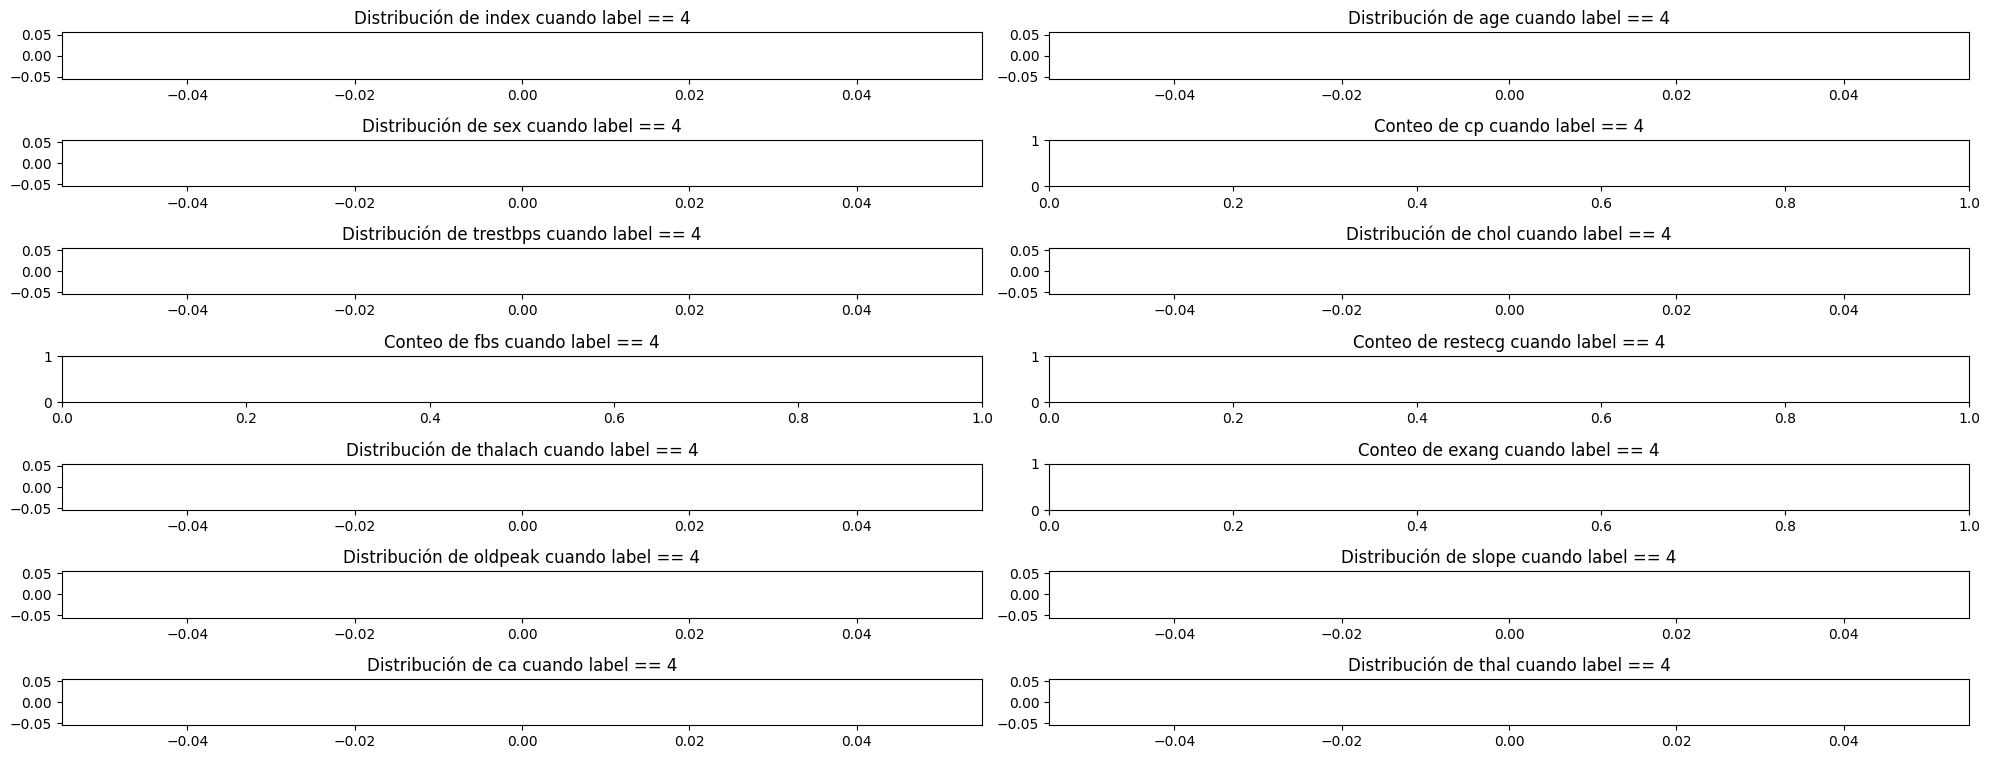

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'df' es tu DataFrame y ya está cargado.

# Filtramos el dataframe para obtener solo las filas donde 'label' == 4
df_filtered = df[df['label'] == 4]

# Lista de todas las columnas excepto 'label', independientemente de su tipo
columns_to_plot = [col for col in df_filtered.columns if col != 'label']

# Configuración de los gráficos
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_plot, 1):
    # Verificamos si la columna es numérica para decidir el tipo de gráfico
    if pd.api.types.is_numeric_dtype(df_filtered[column]):
        plt.subplot(len(columns_to_plot), 2, i)  # Ajustamos según el número de columnas
        sns.histplot(df_filtered[column], kde=True, bins=30)
        plt.title(f'Distribución de {column} cuando label == 4')
    else:
        # Para datos no numéricos, podrías querer hacer un conteo de valores o similar
        plt.subplot(len(columns_to_plot), 2, i)
        sns.countplot(y=column, data=df_filtered)
        plt.title(f'Conteo de {column} cuando label == 4')

plt.tight_layout()
plt.show()


In [252]:
#df.to_csv('df_cleaned.csv')

## CONCLUSIONES